In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


tickers=['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']
data=yf.download(tickers,start='2014-01-01',end='2024-01-01')['Close']

[*********************100%%**********************]  5 of 5 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


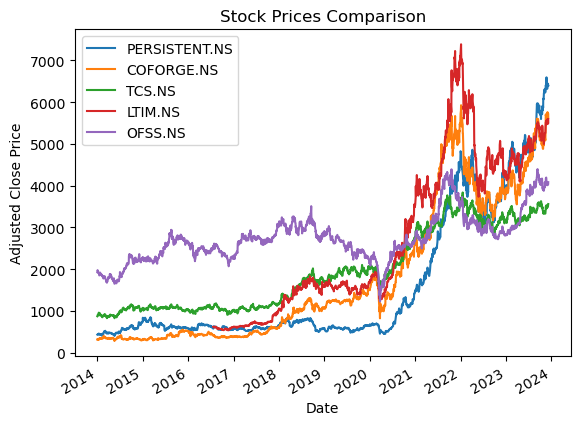

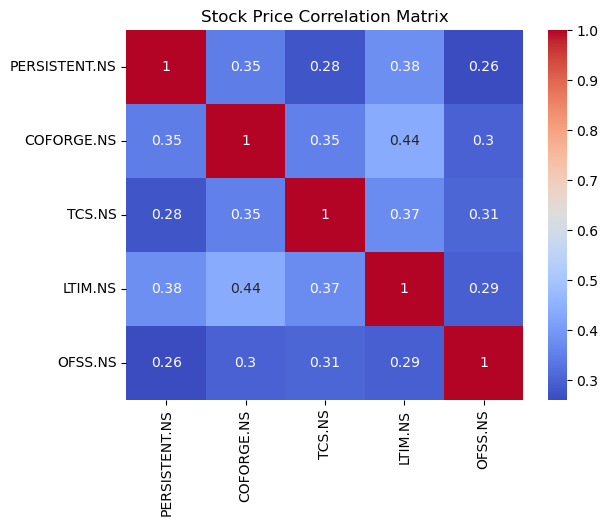

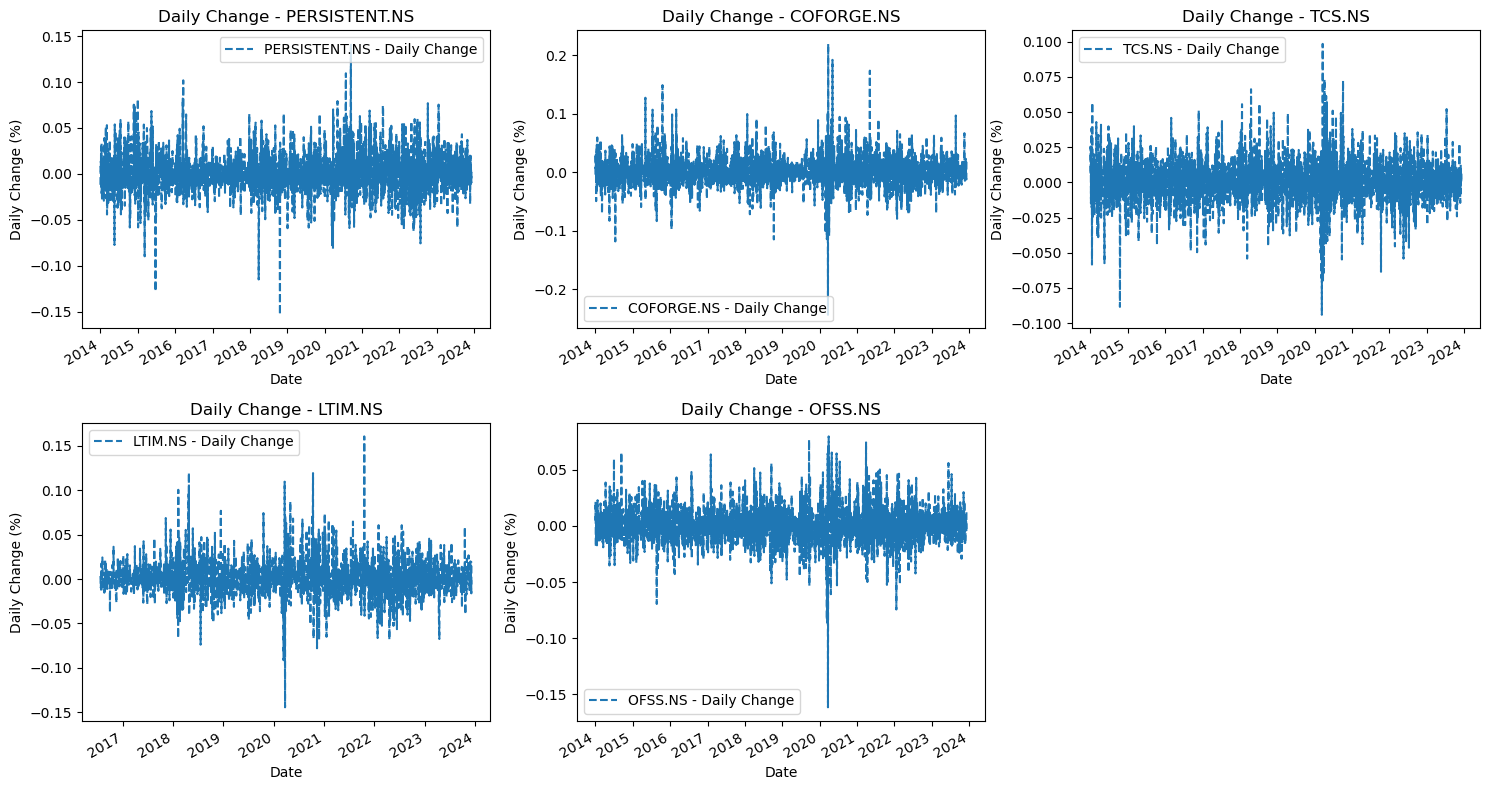

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_line_chart(data, title, ylabel):
    data.plot(title=title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.show()

def plot_correlation_matrix(data):
    correlation_matrix = data.pct_change().corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Stock Price Correlation Matrix')
    plt.show()

def plot_daily_change(dataframes, titles):
    num_plots = len(dataframes)
    rows = 2
    cols = (num_plots + 1) // 2  # Calculate the number of columns needed

    plt.figure(figsize=(15, 8))

    for i, df in enumerate(dataframes, 1):
        plt.subplot(rows, cols, i)
        daily_change = df['Adj Close'].pct_change()
        daily_change.plot(label=f'{titles[i-1]} - Daily Change', linestyle='--')
        plt.title(f'Daily Change - {titles[i-1]}')
        plt.xlabel('Date')
        plt.ylabel('Daily Change (%)')
        plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    tickers = ['PERSISTENT.NS', 'COFORGE.NS', 'TCS.NS', 'LTIM.NS', 'OFSS.NS']
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    # Fetch stock data
    stock_data = pd.DataFrame()
    stock_dataframes = []

    for ticker in tickers:
        data = fetch_stock_data(ticker, start_date, end_date)
        stock_data[ticker] = data['Adj Close']
        stock_dataframes.append(data)

    # Plot line chart for closing prices
    plot_line_chart(stock_data, 'Stock Prices Comparison', 'Adjusted Close Price')

    # Plot correlation matrix
    plot_correlation_matrix(stock_data)

    # Plot daily percentage change for all stocks on the same canvas as separate subplots
    plot_daily_change(stock_dataframes, tickers)

if __name__ == "__main__":
    main()


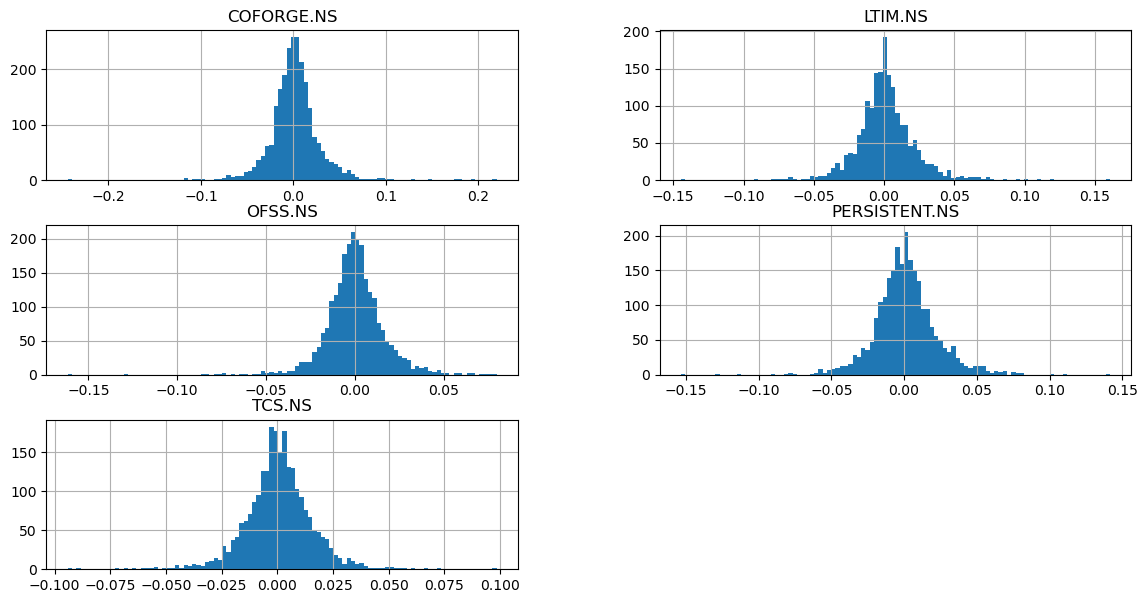

In [20]:
daily_returns=data.pct_change()
volatility=daily_returns.std()*np.sqrt(252)

daily_returns.hist(bins=100,figsize=(14,7))
plt.title('Histogram of Daily Returns')
plt.show()

In [21]:
print(volatility)

COFORGE.NS       0.414459
LTIM.NS          0.334635
OFSS.NS          0.263408
PERSISTENT.NS    0.339975
TCS.NS           0.240421
dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


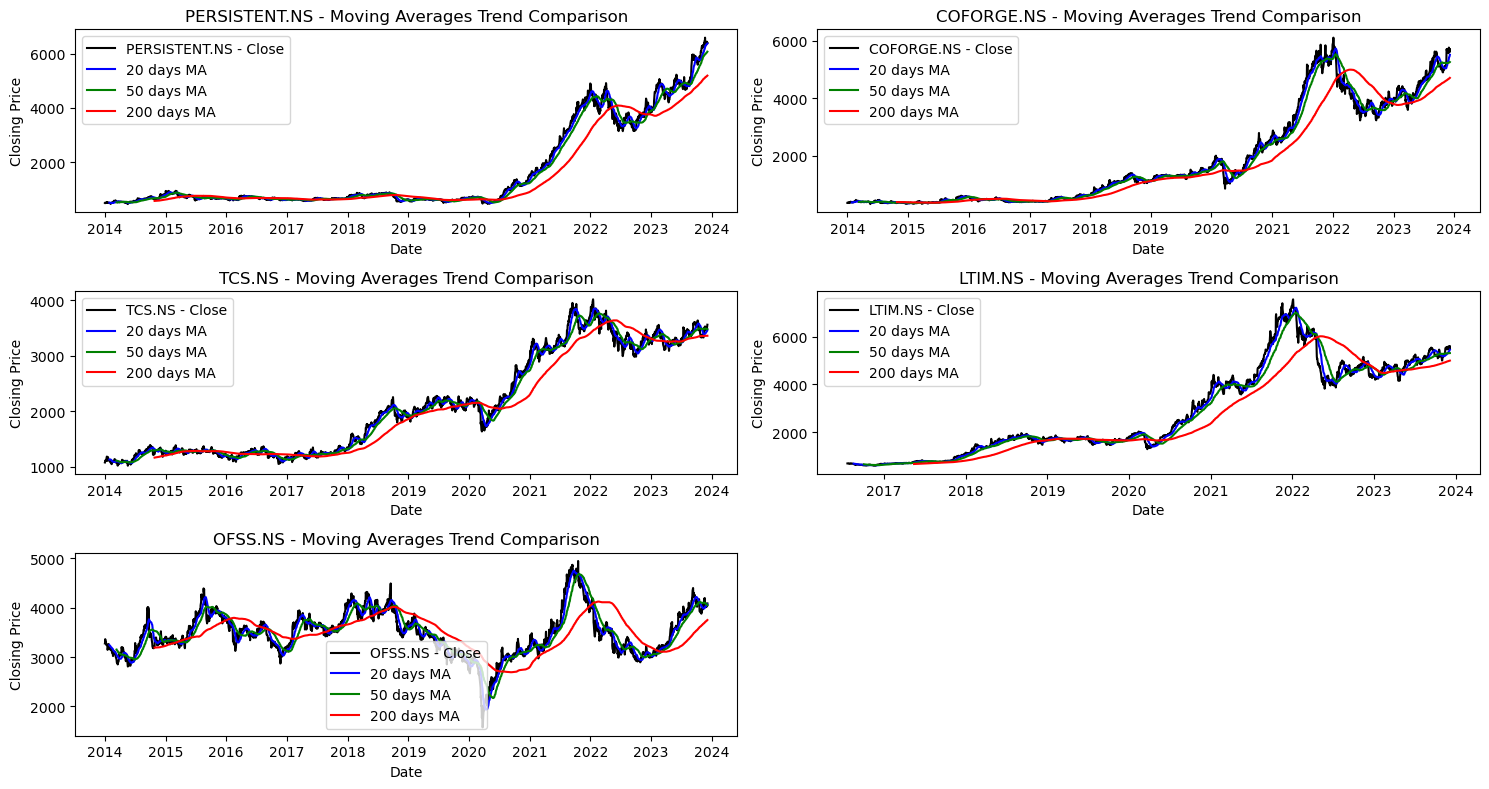

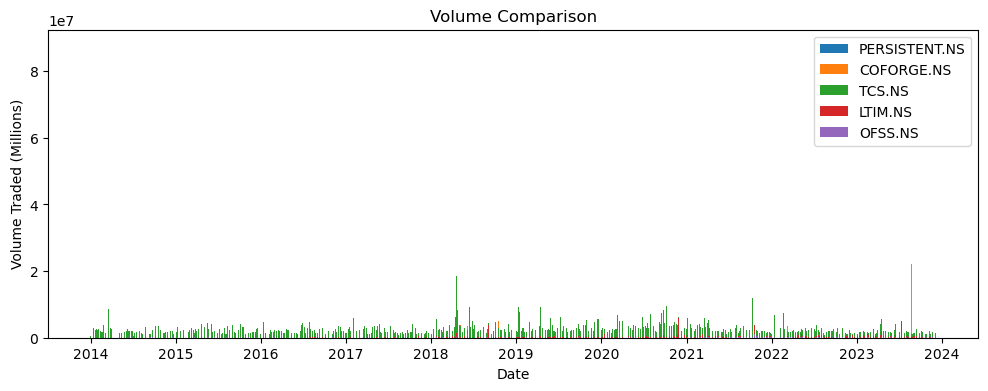

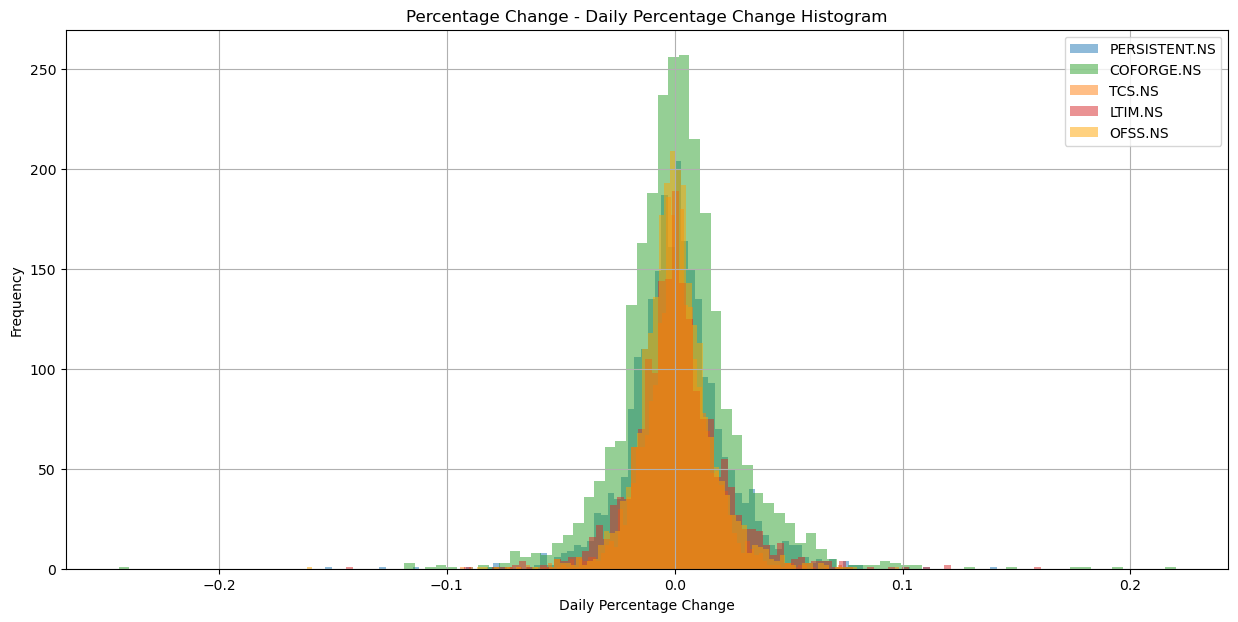

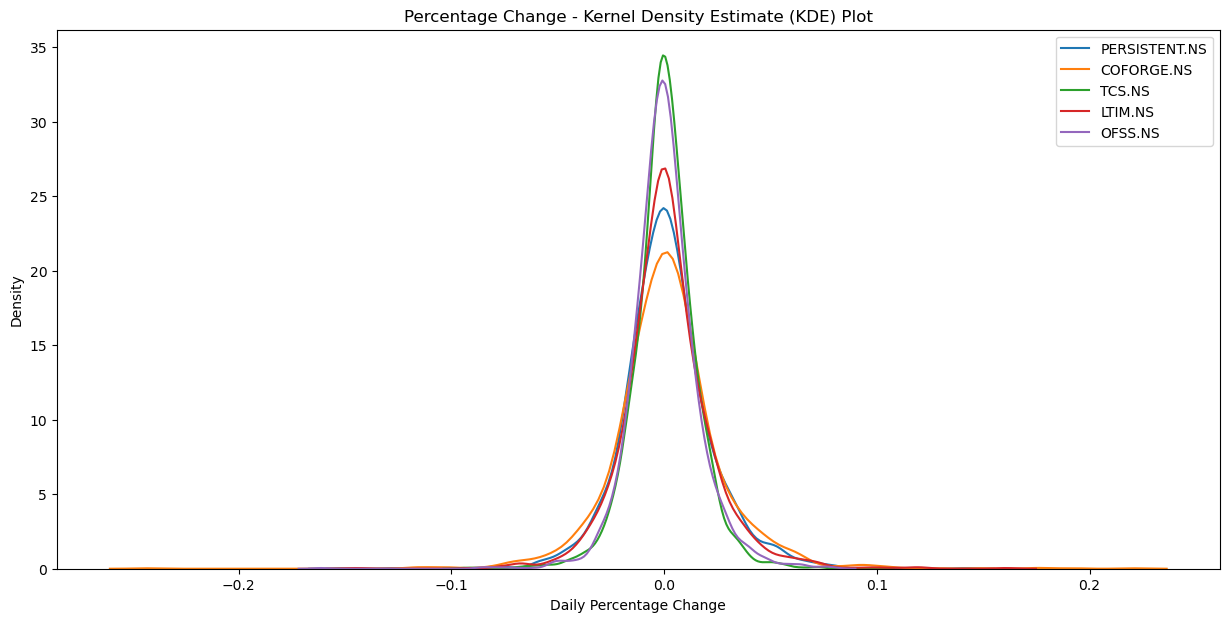

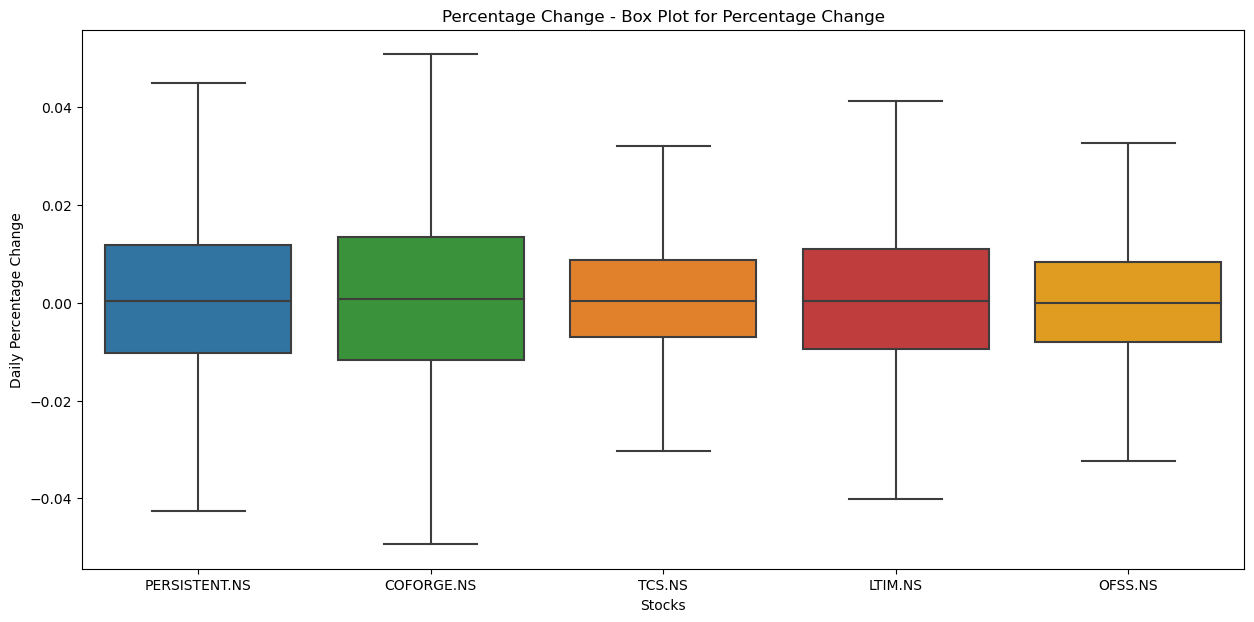

e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
e:\Anaconda\Lib

<Figure size 1000x1000 with 0 Axes>

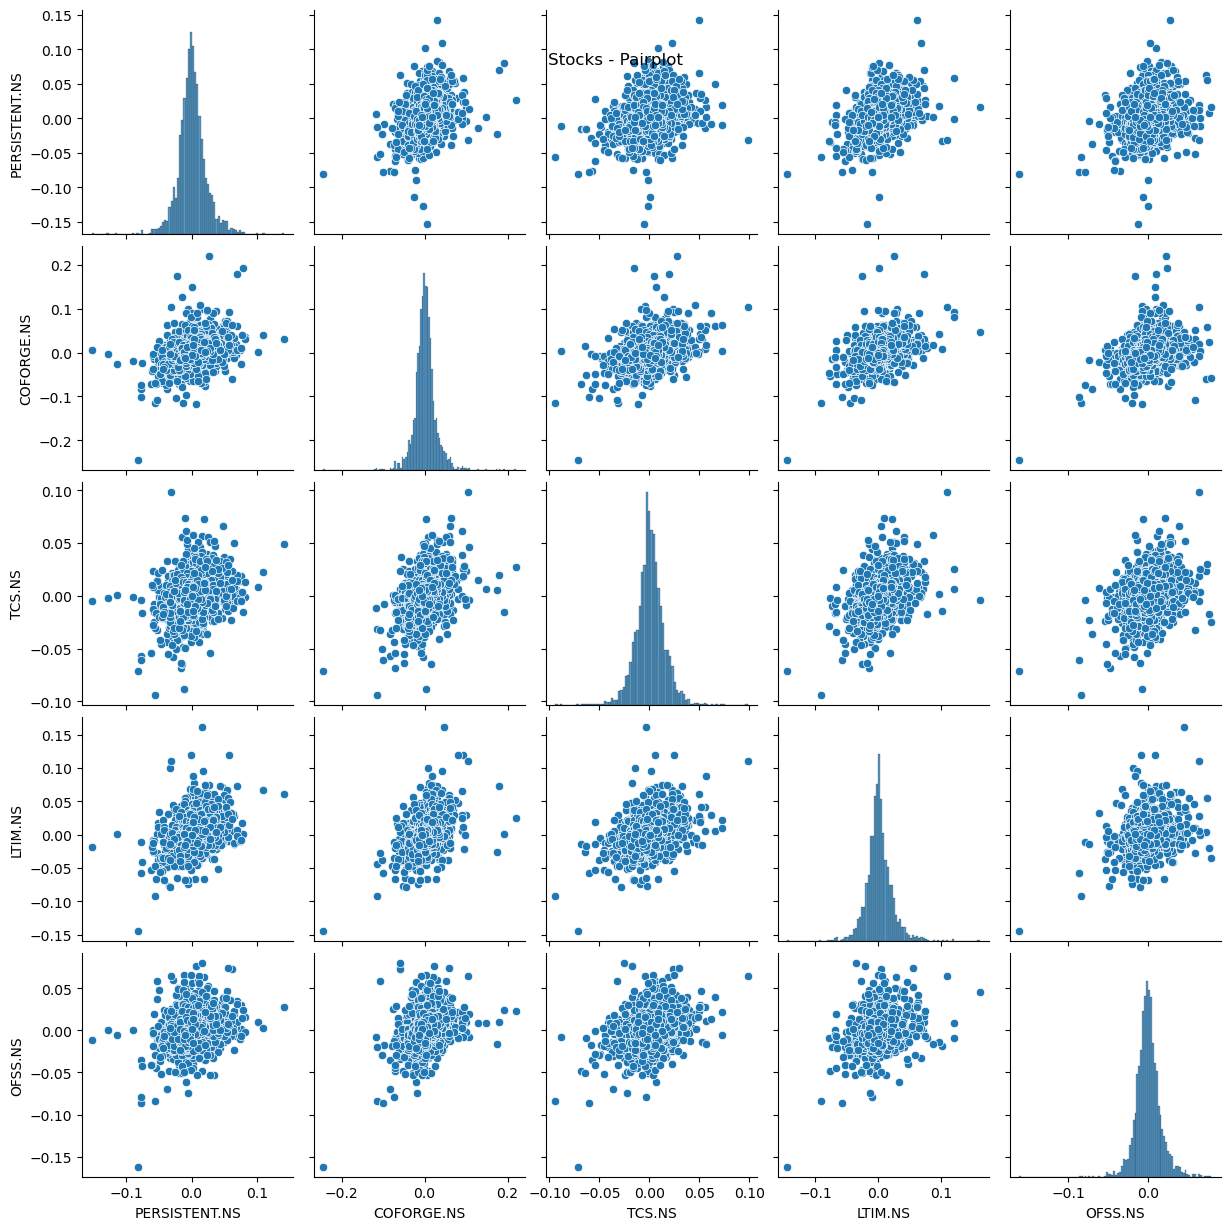

In [22]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['pct_change'] = stock_data['Adj Close'].pct_change()
    return stock_data

def plot_moving_averages(data, title, ylabel):
    plt.figure(figsize=(15, 8))

    for i, (ticker, df) in enumerate(data.items(), 1):
        plt.subplot(3, 2, i)
        plt.plot(df.index, df['Close'], label=f'{ticker} - Close', color='black')
        plt.plot(df.index, df['Close'].rolling(window=20).mean(), label='20 days MA', color='blue')
        plt.plot(df.index, df['Close'].rolling(window=50).mean(), label='50 days MA', color='green')
        plt.plot(df.index, df['Close'].rolling(window=200).mean(), label='200 days MA', color='red')

        plt.title(f'{ticker} - {title}')
        plt.xlabel('Date')
        plt.ylabel(ylabel)
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_volume_comparison(data, title):
    plt.figure(figsize=(12, 4))

    for ticker, df in data.items():
        plt.bar(df.index, df['Volume'], label=ticker)

    max_volume = max(df['Volume'].max() for df in data.values())
    label = 'Volume Traded (Millions)' if max_volume < 1e9 else 'Volume Traded (Billions)'

    plt.title(f'{title} Comparison')
    plt.xlabel('Date')
    plt.ylabel(label)
    plt.legend()
    plt.show()

def plot_percentage_change_histogram(data, title):
    plt.figure(figsize=(15, 7))

    colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728','#ffa500']  # Blue, Green, Orange, Red

    for i, (ticker, df) in enumerate(data.items()):
        df['pct_change'].hist(bins=100, label=ticker, alpha=0.5, color=colors[i])

    plt.legend()
    plt.title(f'{title} - Daily Percentage Change Histogram')
    plt.xlabel('Daily Percentage Change')
    plt.ylabel('Frequency')
    plt.show()

def plot_kde(data, title):
    plt.figure(figsize=(15, 7))

    for ticker, df in data.items():
        sns.kdeplot(df['pct_change'], label=ticker)

    plt.legend()
    plt.title(f'{title} - Kernel Density Estimate (KDE) Plot')
    plt.xlabel('Daily Percentage Change')
    plt.ylabel('Density')
    plt.show()

def plot_box(data, title):
    plt.figure(figsize=(15, 7))

    colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728','#ffa500']  # Blue, Green, Orange, Red

    # Using seaborn for a better box plot
    sns.boxplot(data=data, palette=colors, showfliers=False)

    plt.title(f'{title} - Box Plot for Percentage Change')
    plt.xlabel('Stocks')
    plt.ylabel('Daily Percentage Change')
    plt.show()

def plot_pairplot(data, title, colors):
    plt.figure(figsize=(10, 10))

    # Assign colors based on column labels
    color_dict = {label: color for label, color in zip(data.columns, colors)}
    data_colors = data.columns.map(color_dict)

    # Using seaborn for pairplot
    sns.pairplot(data, palette=data_colors)

    plt.suptitle(f'{title} - Pairplot', y=0.95)
    plt.show()

def main():
    tickers = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']  # Add your desired stock symbols
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    # Fetch stock data for moving averages, volume, and daily percentage change
    plt_data_moving_averages = {}
    plt_data_volume = {}
    plt_data_percentage_change = {}
    
    for ticker in tickers:
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        plt_data_moving_averages[ticker] = stock_data.copy()
        plt_data_volume[ticker] = stock_data.copy()
        plt_data_percentage_change[ticker] = stock_data.copy()

    # Plot moving averages
    plot_moving_averages(plt_data_moving_averages, 'Moving Averages Trend Comparison', 'Closing Price')

    # Plot volume comparison
    plot_volume_comparison(plt_data_volume, 'Volume')

    # Plot daily percentage change histogram
    plot_percentage_change_histogram(plt_data_percentage_change, 'Percentage Change')

    # Plot KDE
    plot_kde(plt_data_percentage_change, 'Percentage Change')

    # Plot Box Plot
    box_df = pd.concat([df['pct_change'] for df in plt_data_percentage_change.values()], axis=1)
    box_df.columns = tickers
    plot_box(box_df, 'Percentage Change')

    # Plot Pairplot
    colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728','#607B8B']  # Blue, Green, Orange, Red
    plot_pairplot(box_df, 'Stocks', colors)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


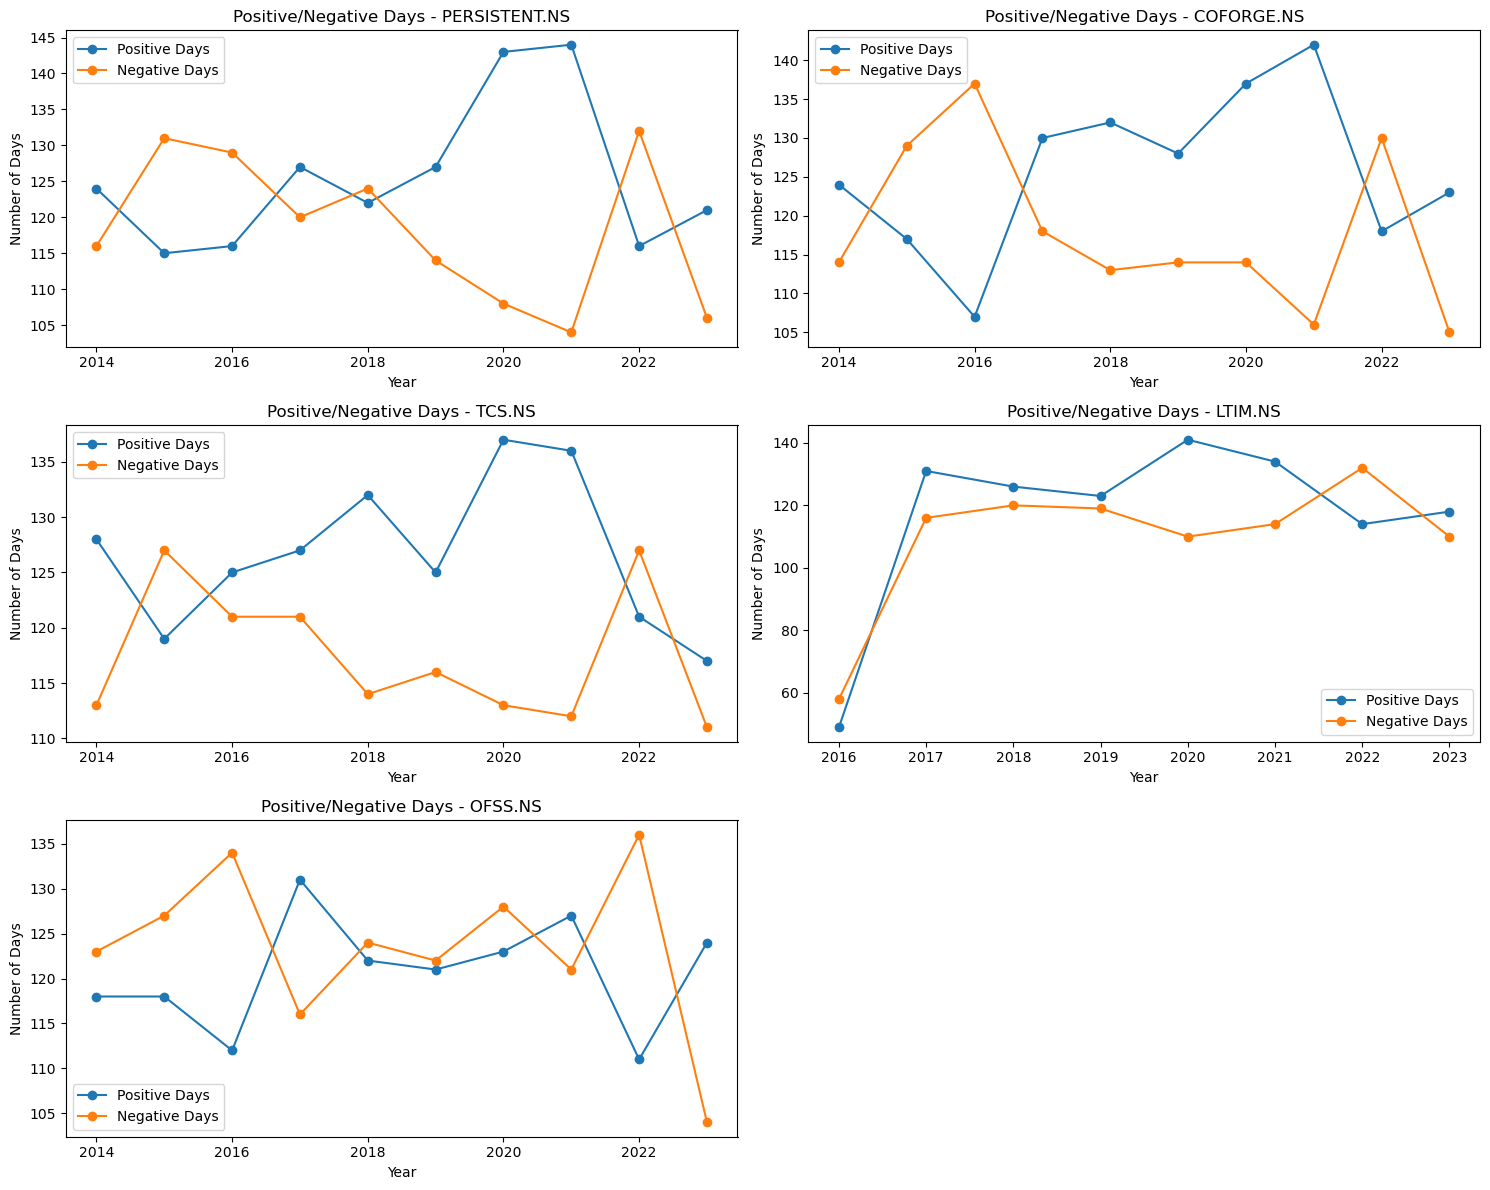

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_positive_negative_days(data, title, subplot):
    plt.subplot(subplot)

    daily_change = data['Adj Close'].pct_change()

    positive_days = daily_change[daily_change > 0].resample('Y').count()
    negative_days = daily_change[daily_change < 0].resample('Y').count()

    years = positive_days.index.year

    plt.plot(years, positive_days, marker='o', linestyle='-', label='Positive Days')
    plt.plot(years, negative_days, marker='o', linestyle='-', label='Negative Days')

    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.title(title)
    plt.legend()

def main():
    tickers = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']  # Add your desired stock symbols
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    # Fetch stock data
    num_rows = 3  # Define the number of rows for subplots
    num_cols = 2  # Define the number of columns for subplots
    plt.figure(figsize=(15, 12))

    for i, ticker in enumerate(tickers, 1):
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        subplot_num = num_rows * 100 + num_cols * 10 + i
        plot_positive_negative_days(stock_data, f'Positive/Negative Days - {ticker}', subplot_num)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


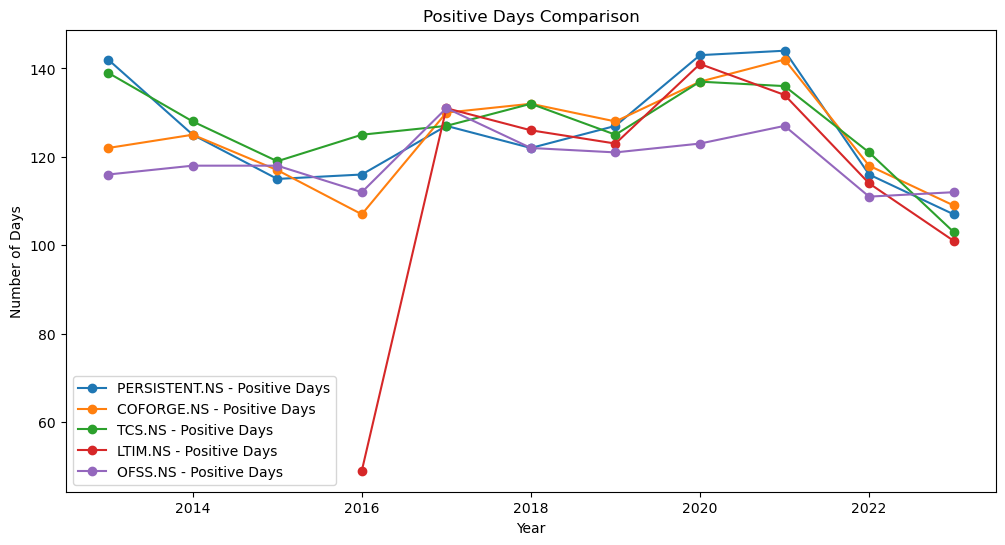

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


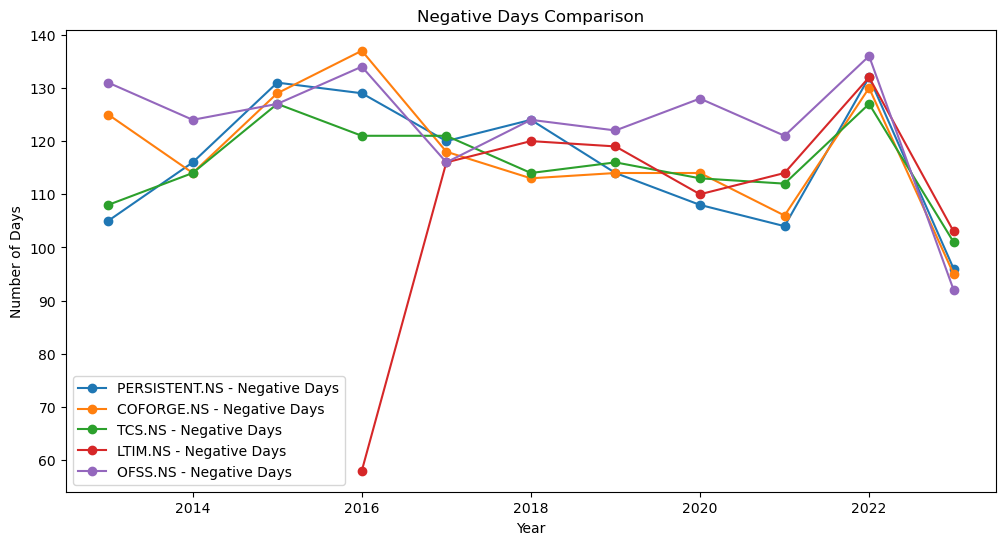

In [24]:


def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_positive_days(data, title, ticker):
    daily_change = data['Adj Close'].pct_change()
    positive_days = daily_change[daily_change > 0].resample('Y').count()
    years = positive_days.index.year

    plt.plot(years, positive_days, marker='o', linestyle='-', label=f'{ticker} - Positive Days')

def plot_negative_days(data, title, ticker):
    daily_change = data['Adj Close'].pct_change()
    negative_days = daily_change[daily_change < 0].resample('Y').count()
    years = negative_days.index.year

    plt.plot(years, negative_days, marker='o', linestyle='-', label=f'{ticker} - Negative Days')

def main():
    tickers = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']  # Add your desired stock symbols
    start_date = '2013-01-01'
    end_date = '2023-11-01'

    plt.figure(figsize=(12, 6))

    # Fetch stock data
    for ticker in tickers:
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        plot_positive_days(stock_data, 'Positive Days', ticker)

    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.title('Positive Days Comparison')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))

    # Fetch stock data for negative days
    for ticker in tickers:
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        plot_negative_days(stock_data, 'Negative Days', ticker)

    plt.xlabel('Year')
    plt.ylabel('Number of Days')
    plt.title('Negative Days Comparison')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [44]:


# Define the companies' ticker symbols
companies = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']

# Fetch data for each company
data = {ticker: yf.download(ticker, start='2020-01-01', end='2024-01-01') for ticker in companies}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


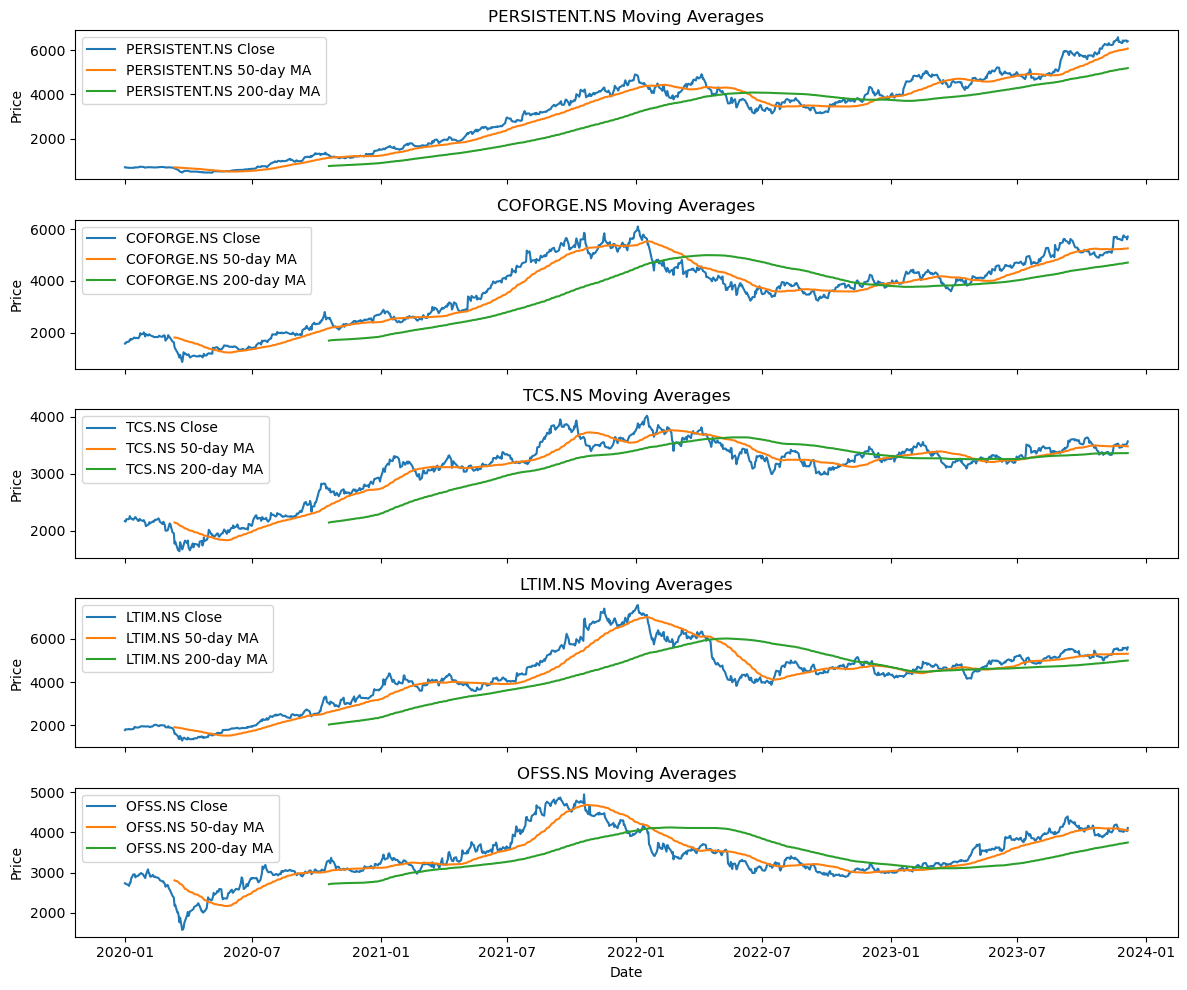

In [45]:
fig, axs = plt.subplots(len(companies), 1, figsize=(12, 10), sharex=True)

for i, (ticker, df) in enumerate(data.items()):
    df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
    df['MA200'] = df['Close'].rolling(window=200).mean()  # 200-day moving average
    
    axs[i].plot(df.index, df['Close'], label=f'{ticker} Close')
    axs[i].plot(df.index, df['MA50'], label=f'{ticker} 50-day MA')
    axs[i].plot(df.index, df['MA200'], label=f'{ticker} 200-day MA')
    axs[i].set_title(f'{ticker} Moving Averages')
    axs[i].set_ylabel('Price')
    axs[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

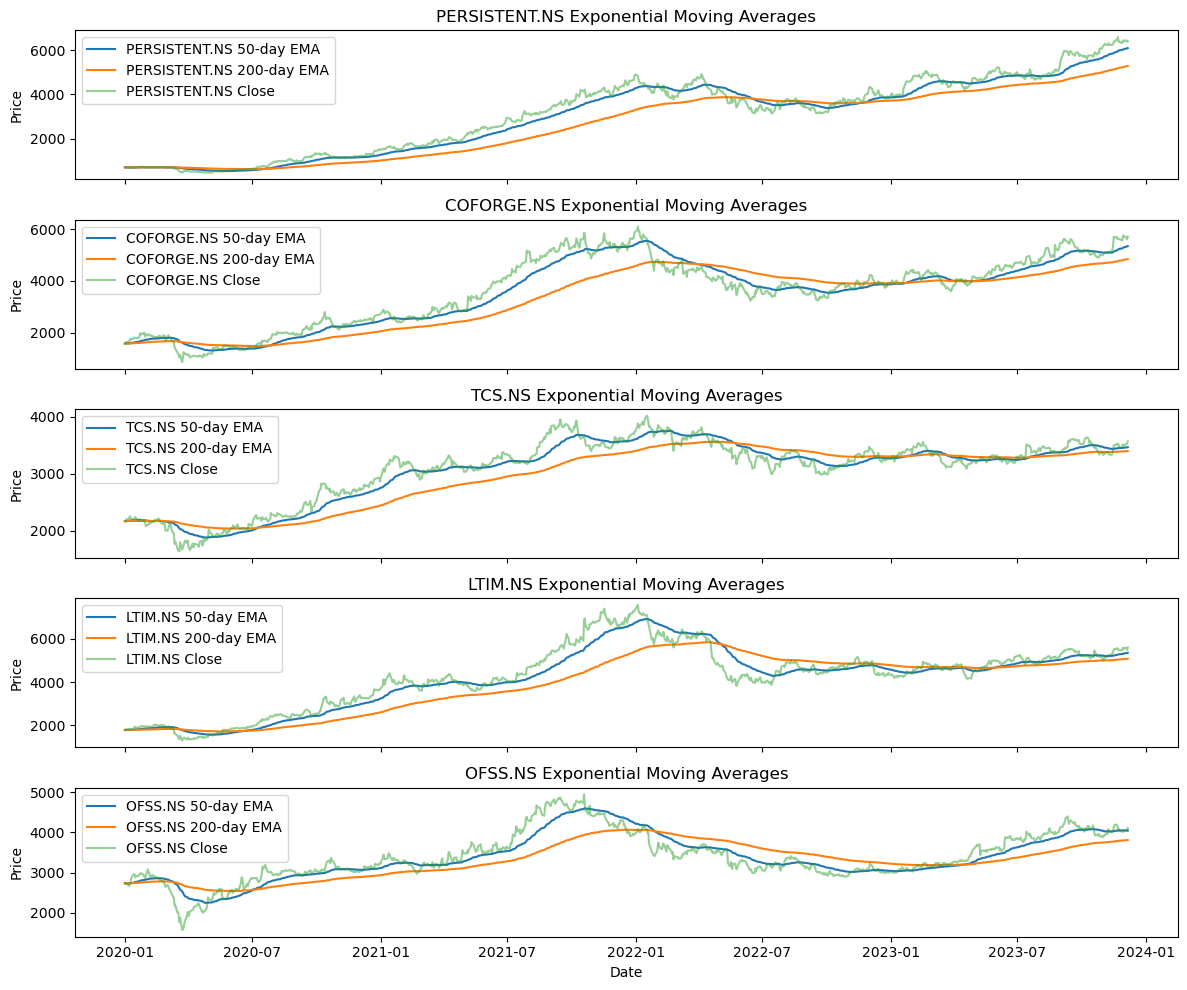

In [46]:
fig, axs = plt.subplots(len(companies), 1, figsize=(12, 10), sharex=True)

for i, (ticker, df) in enumerate(data.items()):
    df['EMA50'] = df['Close'].ewm(span=50, min_periods=0, adjust=False).mean()  # 50-day exponential moving average
    df['EMA200'] = df['Close'].ewm(span=200, min_periods=0, adjust=False).mean()  # 200-day exponential moving average
    
    axs[i].plot(df.index, df['EMA50'], label=f'{ticker} 50-day EMA')
    axs[i].plot(df.index, df['EMA200'], label=f'{ticker} 200-day EMA')
    axs[i].plot(df.index, df['Close'], label=f'{ticker} Close', alpha=0.5)  # Add close price for comparison
    axs[i].set_title(f'{ticker} Exponential Moving Averages')
    axs[i].set_ylabel('Price')
    axs[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

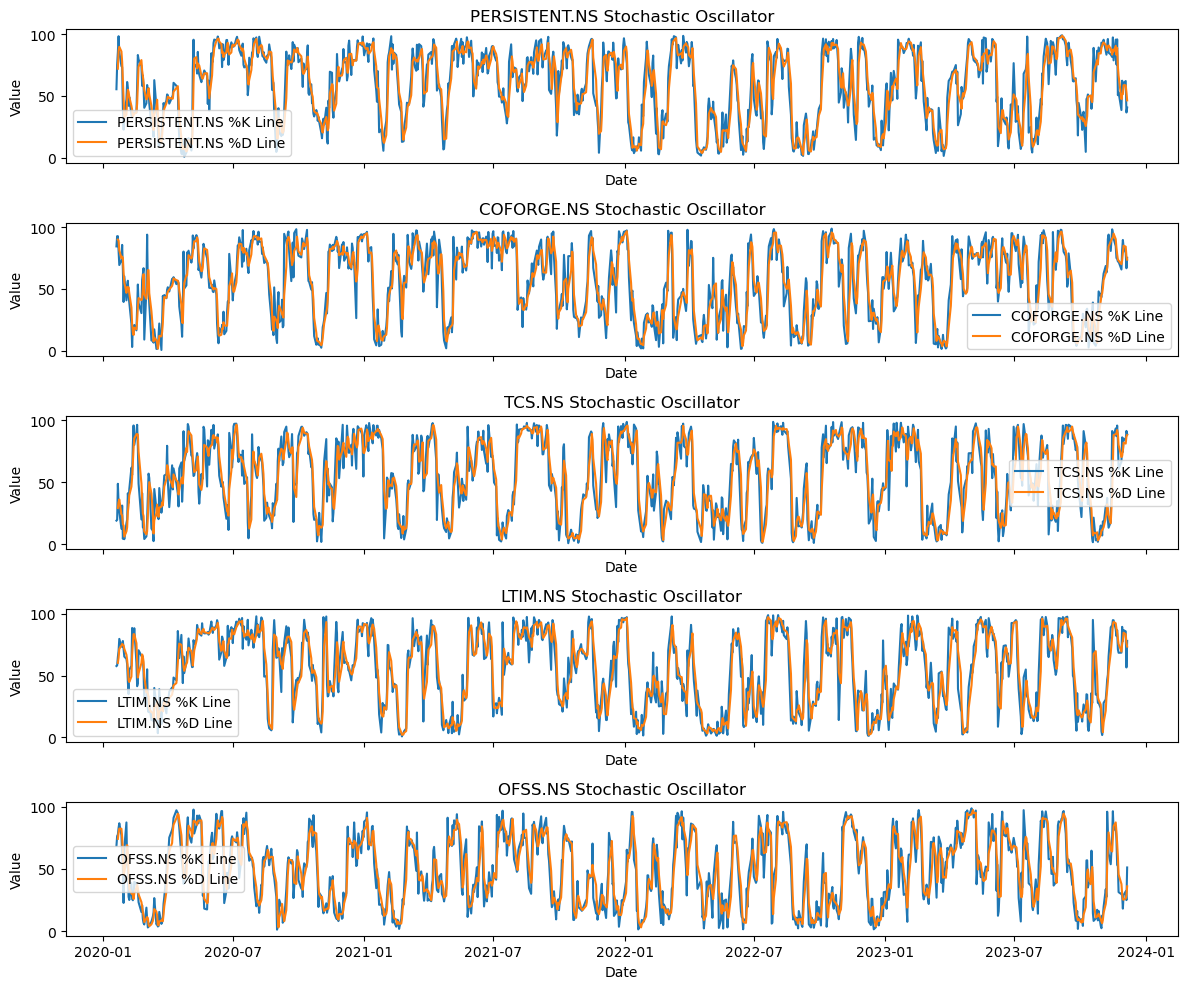

In [47]:
fig, axs = plt.subplots(len(companies), 1, figsize=(12, 10), sharex=True)

for i, (ticker, df) in enumerate(data.items()):
    period = 14  # Adjust this period as needed
    df['LowestLow'] = df['Low'].rolling(window=period).min()
    df['HighestHigh'] = df['High'].rolling(window=period).max()

    df['%K'] = ((df['Close'] - df['LowestLow']) / (df['HighestHigh'] - df['LowestLow'])) * 100
    df['%D'] = df['%K'].rolling(window=3).mean()  # Smoothing with a 3-period moving average for %K

    # Plotting Stochastic Oscillator for each company on separate subplots
    axs[i].plot(df.index, df['%K'], label=f'{ticker} %K Line')
    axs[i].plot(df.index, df['%D'], label=f'{ticker} %D Line')
    axs[i].set_title(f'{ticker} Stochastic Oscillator')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

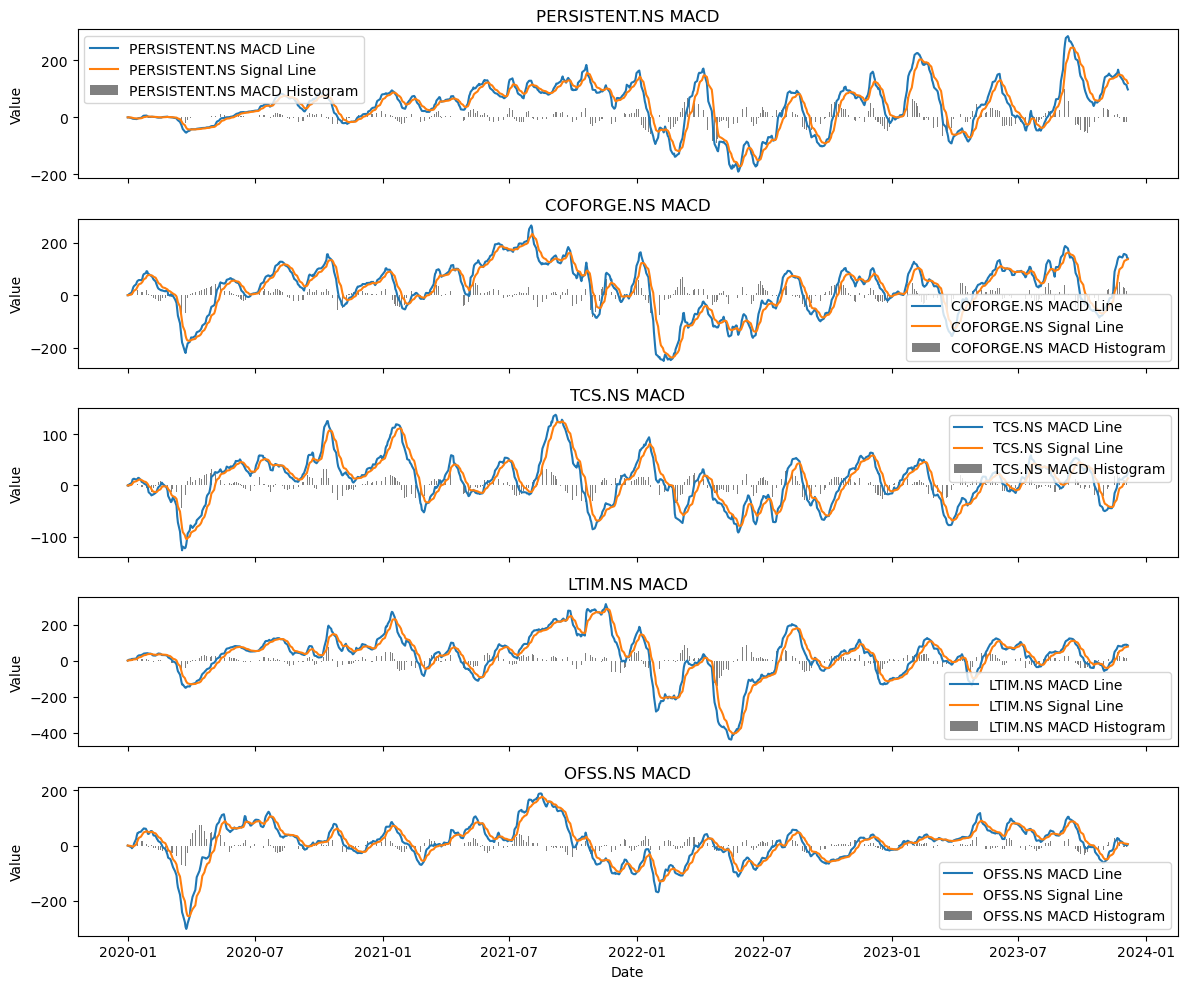

In [48]:
fig, axs = plt.subplots(len(companies), 1, figsize=(12, 10), sharex=True)

for i, (ticker, df) in enumerate(data.items()):
    short_period = 12  # Shorter-term EMA period
    long_period = 26   # Longer-term EMA period
    signal_period = 9  # Signal line period

    df['ShortEMA'] = df['Close'].ewm(span=short_period, min_periods=0, adjust=False).mean()
    df['LongEMA'] = df['Close'].ewm(span=long_period, min_periods=0, adjust=False).mean()

    df['MACD'] = df['ShortEMA'] - df['LongEMA']
    df['SignalLine'] = df['MACD'].ewm(span=signal_period, min_periods=0, adjust=False).mean()

    # Plotting MACD for each company on separate subplots
    axs[i].plot(df.index, df['MACD'], label=f'{ticker} MACD Line')
    axs[i].plot(df.index, df['SignalLine'], label=f'{ticker} Signal Line')
    axs[i].bar(df.index, df['MACD'] - df['SignalLine'], width=0.5, label=f'{ticker} MACD Histogram', color='grey')
    axs[i].set_title(f'{ticker} MACD')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


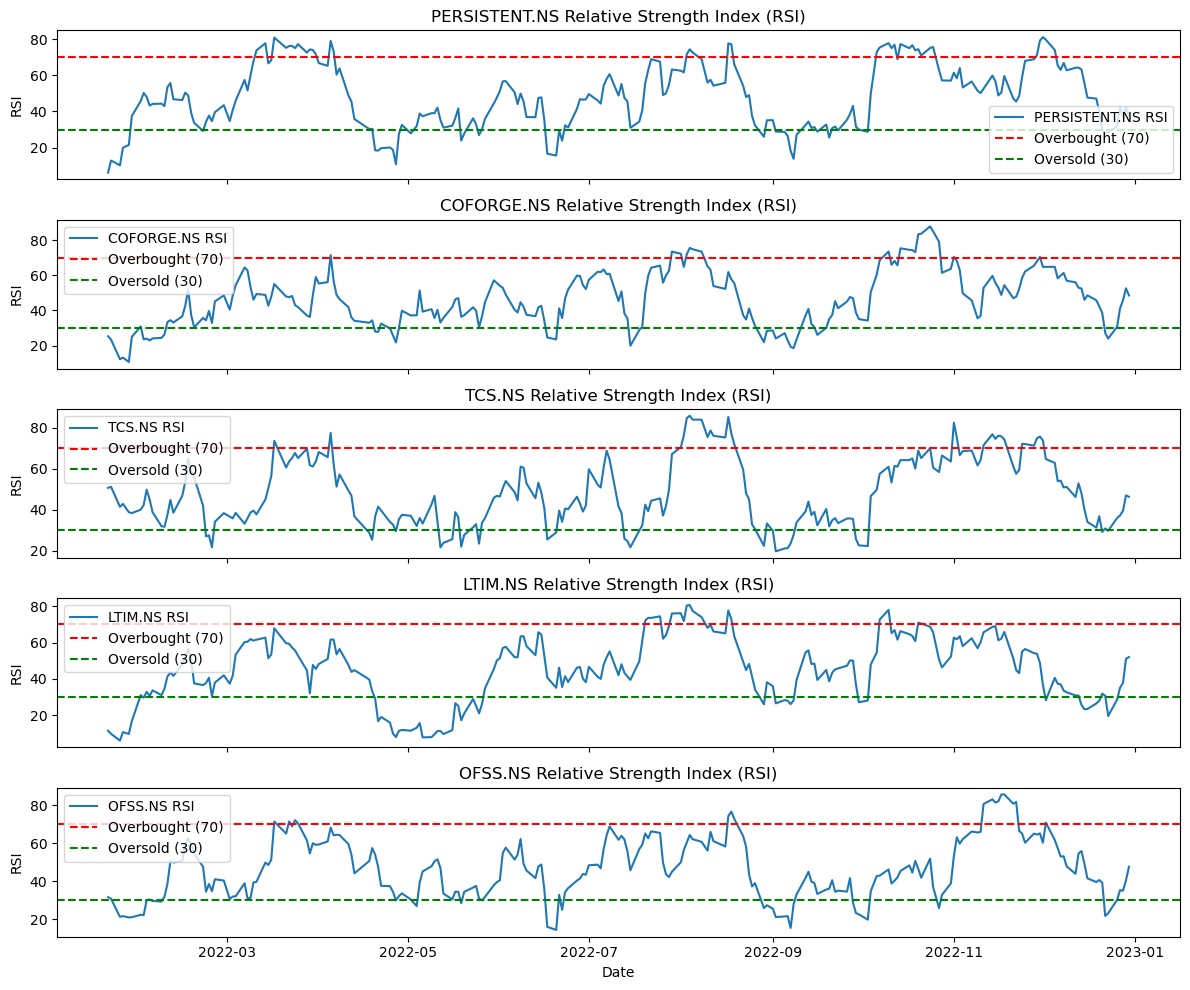

In [49]:
fig, axs = plt.subplots(len(companies), 1, figsize=(12, 10), sharex=True)

for i, ticker in enumerate(companies):
    # Fetch historical data
    data = yf.download(ticker, start='2022-01-01', end='2023-01-01')

    # Calculate daily price changes
    data['PriceChange'] = data['Close'].diff()

    # Define the lookback period for RSI calculation
    window = 14

    # Calculate the gains and losses
    data['Gain'] = data['PriceChange'].apply(lambda x: x if x > 0 else 0).rolling(window=window).mean()
    data['Loss'] = data['PriceChange'].apply(lambda x: abs(x) if x < 0 else 0).rolling(window=window).mean()

    # Calculate the Relative Strength (RS) and the Relative Strength Index (RSI)
    data['RS'] = data['Gain'] / data['Loss']
    data['RSI'] = 100 - (100 / (1 + data['RS']))

    # Plotting the RSI for each company on separate subplots
    axs[i].plot(data.index, data['RSI'], label=f'{ticker} RSI')
    axs[i].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axs[i].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axs[i].set_title(f'{ticker} Relative Strength Index (RSI)')
    axs[i].set_ylabel('RSI')
    axs[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


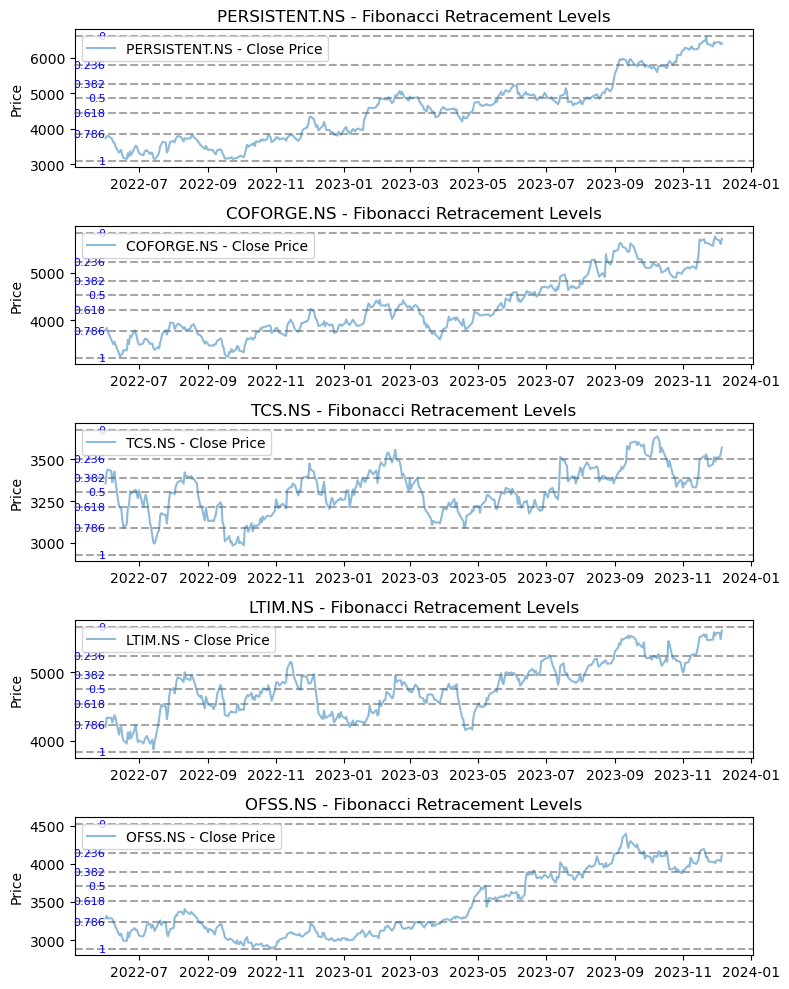

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


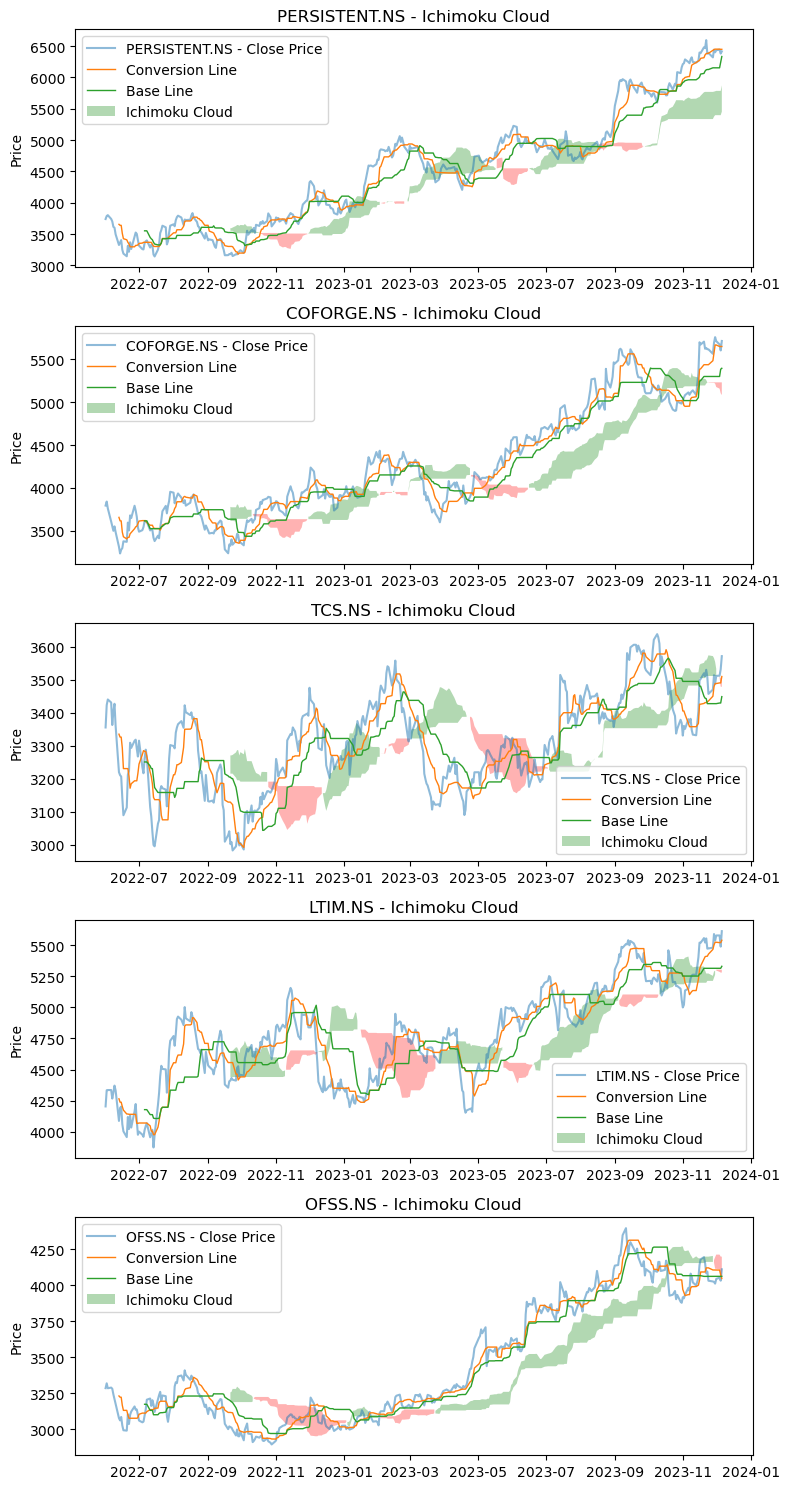

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


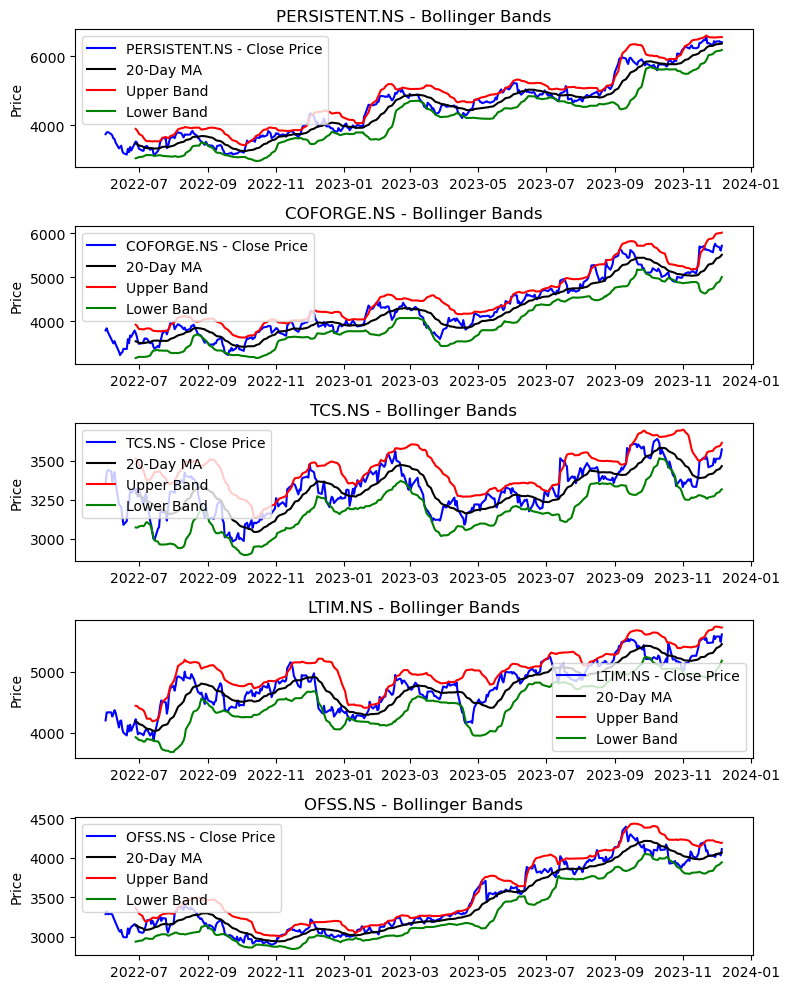

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


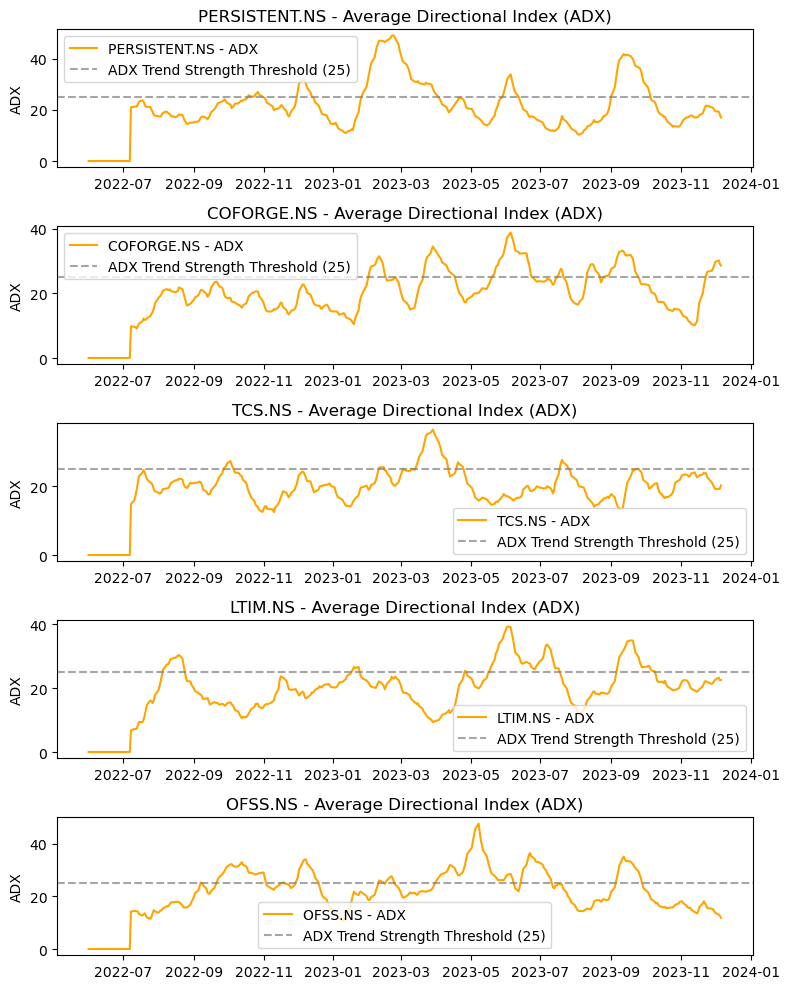

In [50]:

from ta.trend import ADXIndicator

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def plot_fibonacci_retracement(ax, data, fib_levels, ticker):
    high = data['High'].max()
    low = data['Low'].min()
    diff = high - low

    for level in fib_levels:
        price = high - diff * level
        ax.axhline(price, linestyle='--', color='grey', alpha=0.7)
        ax.text(data.index[0], price, f'{level}', va='center', ha='right', color='blue', fontsize=8)

    ax.plot(data.index, data['Close'], label=f'{ticker} - Close Price', alpha=0.5)
    ax.set_title(f'{ticker} - Fibonacci Retracement Levels')
    ax.set_ylabel('Price')
    ax.legend()

def plot_ichimoku_cloud(ax, data, ticker, conversion_line_period=9, base_line_period=26, leading_span_b_period=52, displacement=26):
    high_conv = data['High'].rolling(window=conversion_line_period).max()
    low_conv = data['Low'].rolling(window=conversion_line_period).min()
    data['ConversionLine'] = (high_conv + low_conv) / 2

    high_base = data['High'].rolling(window=base_line_period).max()
    low_base = data['Low'].rolling(window=base_line_period).min()
    data['BaseLine'] = (high_base + low_base) / 2

    data['LeadingSpanA'] = ((data['ConversionLine'] + data['BaseLine']) / 2).shift(displacement)

    high_span_b = data['High'].rolling(window=leading_span_b_period).max()
    low_span_b = data['Low'].rolling(window=leading_span_b_period).min()
    data['LeadingSpanB'] = ((high_span_b + low_span_b) / 2).shift(displacement)

    ax.plot(data.index, data['Close'], label=f'{ticker} - Close Price', alpha=0.5)
    ax.plot(data.index, data['ConversionLine'], label='Conversion Line', linestyle='-', linewidth=1)
    ax.plot(data.index, data['BaseLine'], label='Base Line', linestyle='-', linewidth=1)
    ax.fill_between(data.index, data['LeadingSpanA'], data['LeadingSpanB'], where=data['LeadingSpanA'] >= data['LeadingSpanB'], facecolor='green', alpha=0.3, label='Ichimoku Cloud')
    ax.fill_between(data.index, data['LeadingSpanA'], data['LeadingSpanB'], where=data['LeadingSpanA'] < data['LeadingSpanB'], facecolor='red', alpha=0.3)
    ax.set_title(f'{ticker} - Ichimoku Cloud')
    ax.set_ylabel('Price')
    ax.legend()

def plot_bollinger_bands(ax, data, ticker, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()

    data['UpperBand'] = data['MA'] + 2 * data['STD']
    data['LowerBand'] = data['MA'] - 2 * data['STD']

    ax.plot(data.index, data['Close'], label=f'{ticker} - Close Price', color='blue')
    ax.plot(data.index, data['MA'], label='20-Day MA', color='black')
    ax.plot(data.index, data['UpperBand'], label='Upper Band', color='red')
    ax.plot(data.index, data['LowerBand'], label='Lower Band', color='green')
    ax.set_title(f'{ticker} - Bollinger Bands')
    ax.set_ylabel('Price')
    ax.legend()

def plot_average_directional_index(ax, data, ticker, adx_window=14):
    adx = ADXIndicator(data['High'], data['Low'], data['Close'], window=adx_window)
    data['ADX'] = adx.adx()

    ax.plot(data.index, data['ADX'], label=f'{ticker} - ADX', color='orange')
    ax.axhline(25, linestyle='--', color='grey', alpha=0.7, label='ADX Trend Strength Threshold (25)')
    ax.set_title(f'{ticker} - Average Directional Index (ADX)')
    ax.set_ylabel('ADX')
    ax.legend()

# Example Usage:
tickers = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']
start_date = '2022-06-01'
end_date = '2024-01-01'

fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]

# First Canvas - Fibonacci Retracement
fig_fibonacci, axs_fibonacci = plt.subplots(len(tickers), 1, figsize=(8, 2* len(tickers)))

for i, ticker in enumerate(tickers):
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    plot_fibonacci_retracement(axs_fibonacci[i], stock_data, fibonacci_levels, ticker)

plt.tight_layout()
plt.show()

# Second Canvas - Ichimoku Cloud
fig_ichimoku, axs_ichimoku = plt.subplots(len(tickers), 1, figsize=(8, 3 * len(tickers)))

for i, ticker in enumerate(tickers):
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    plot_ichimoku_cloud(axs_ichimoku[i], stock_data, ticker)

plt.tight_layout()
plt.show()

# Third Canvas - Bollinger Bands
fig_bollinger, axs_bollinger = plt.subplots(len(tickers), 1, figsize=(8, 2 * len(tickers)))

for i, ticker in enumerate(tickers):
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    plot_bollinger_bands(axs_bollinger[i], stock_data, ticker)

plt.tight_layout()
plt.show()

# Fourth Canvas - Average Directional Index (ADX)
fig_adx, axs_adx = plt.subplots(len(tickers), 1, figsize=(8, 2* len(tickers)))

for i, ticker in enumerate(tickers):
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    plot_average_directional_index(axs_adx[i], stock_data, ticker)

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

def read_excel_sheets(file_path):
    try:
        # Read all sheets from the Excel file
        excel_data = pd.read_excel(file_path, sheet_name=None)
        return excel_data
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

def plot_all_years_vs_income_and_dividend_and_profit_loss(data):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    for sheet_name, sheet_data in data.items():
        years = sheet_data['Year']  # Extract the 'Year' column

        # Identify columns related to income, dividend, and net profit/loss
        income_columns = [col for col in sheet_data.columns if 'Income' in col]
        dividend_columns = [col for col in sheet_data.columns if 'Dividend' in col]
        profit_loss_columns = [col for col in sheet_data.columns if 'Net Profit/Loss' in col]

        # Plot Year vs Income
        for column in income_columns:
            axes[0].plot(years, sheet_data[column], marker='o', linestyle='-', label=f"{sheet_name}: {column}")

        # Plot Year vs Dividend
        for column in dividend_columns:
            axes[1].plot(years, sheet_data[column], marker='o', linestyle='-', label=f"{sheet_name}: {column}")

        # Plot Year vs Net Profit/Loss
        for column in profit_loss_columns:
            axes[2].plot(years, sheet_data[column], marker='o', linestyle='-', label=f"{sheet_name}: {column}")

    # Set titles and labels for the subplots
    axes[0].set_title("All Sheets: All Years vs Income")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Income")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("All Sheets: All Years vs Dividend")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Dividend")
    axes[1].legend()
    axes[1].grid(True)

    axes[2].set_title("All Sheets: All Years vs Net Profit/Loss")
    axes[2].set_xlabel("Year")
    axes[2].set_ylabel("Net Profit/Loss")
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Replace 'ITCompaniesv2.xlsx' with your Excel file name
file_path = 'ITCompaniesv2.xlsx'

# Call the function to read all sheets from the Excel file
excel_sheets = read_excel_sheets(file_path)

if excel_sheets is not None:
    plot_all_years_vs_income_and_dividend_and_profit_loss(excel_sheets)


File not found. Please provide a valid file path.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


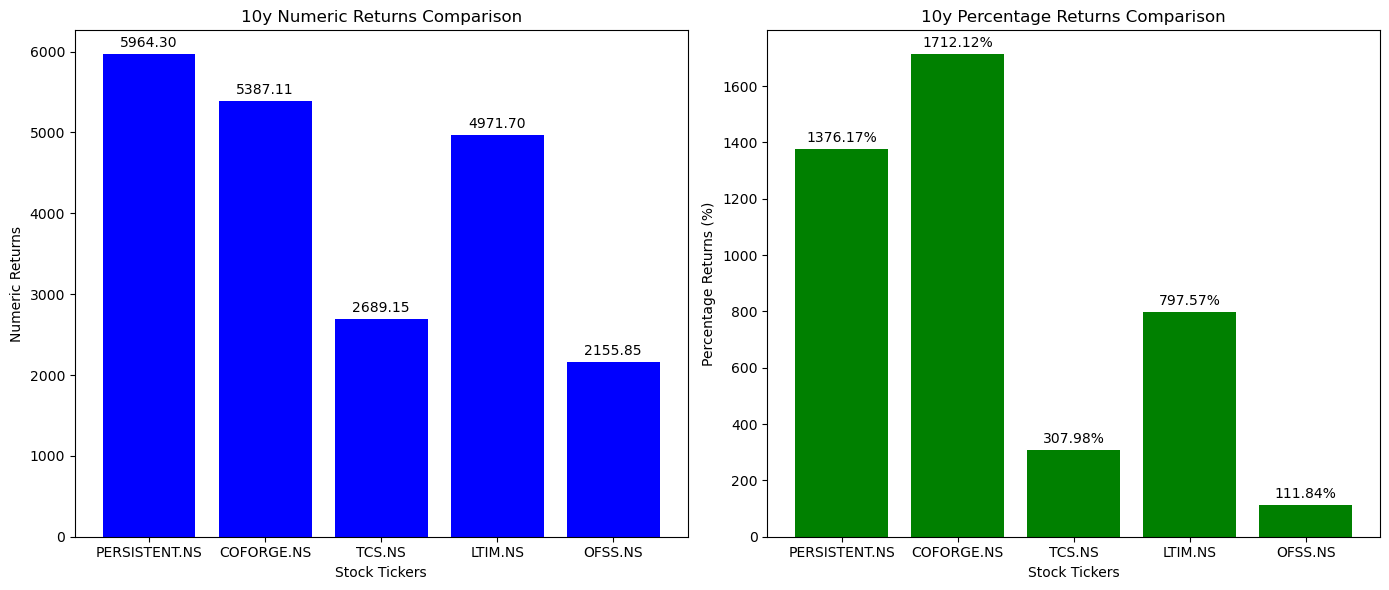

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


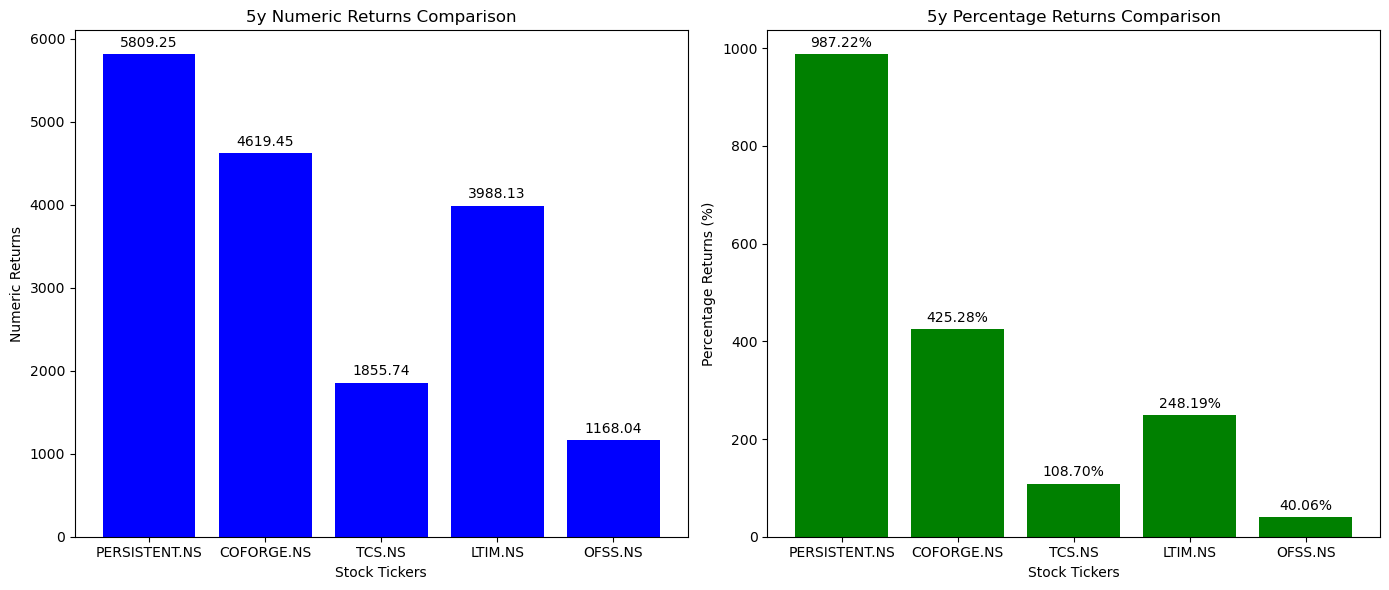

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


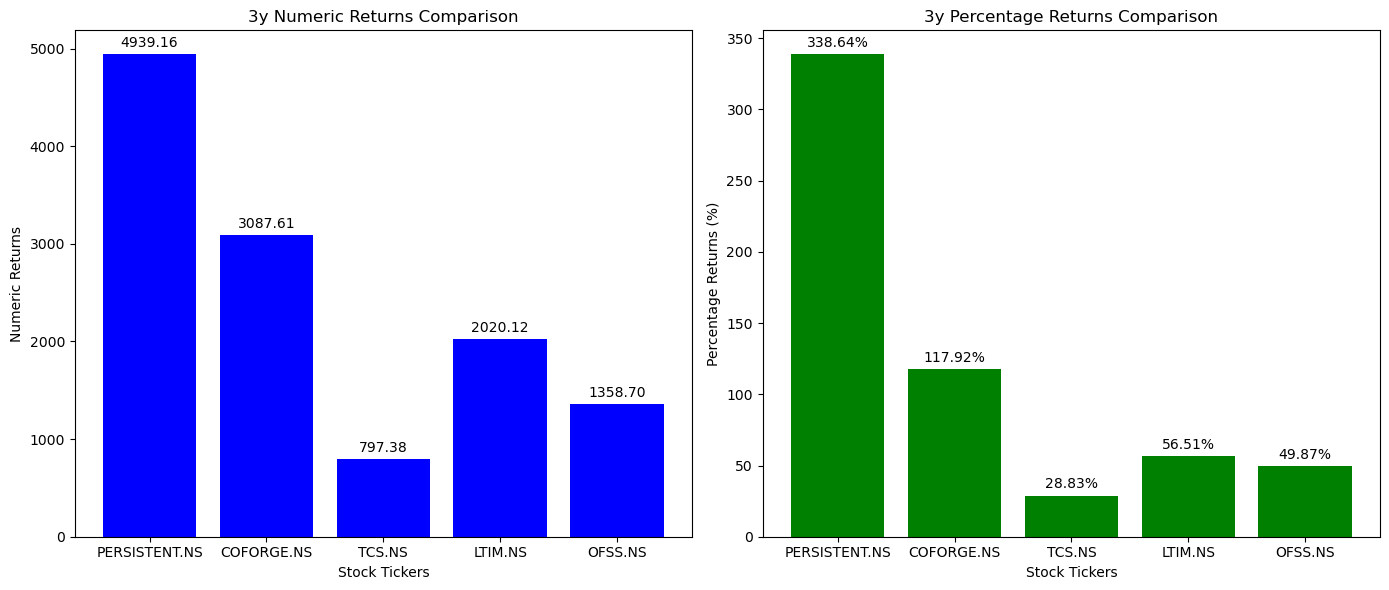

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


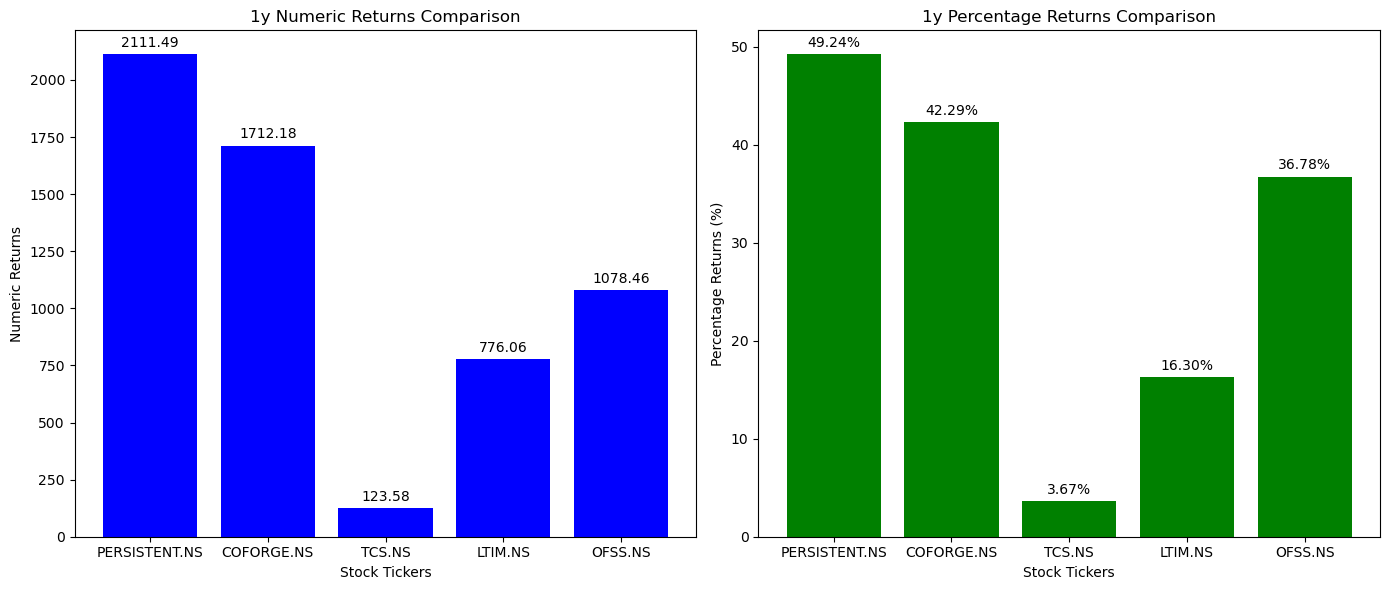

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


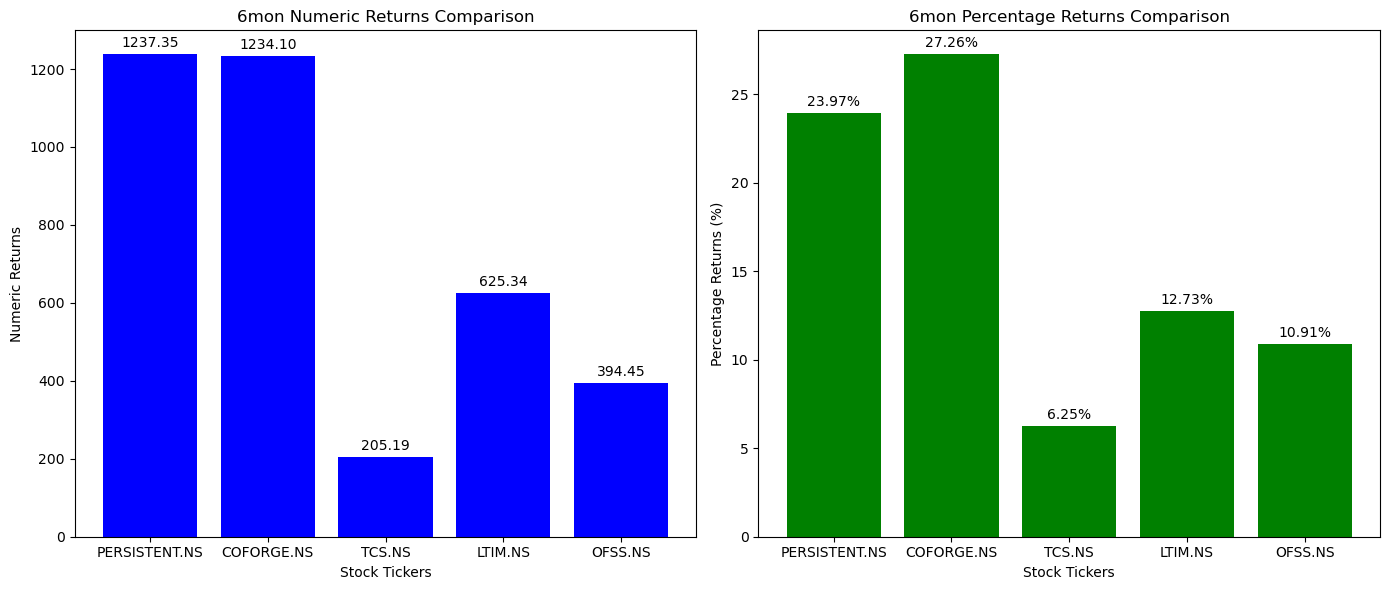

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


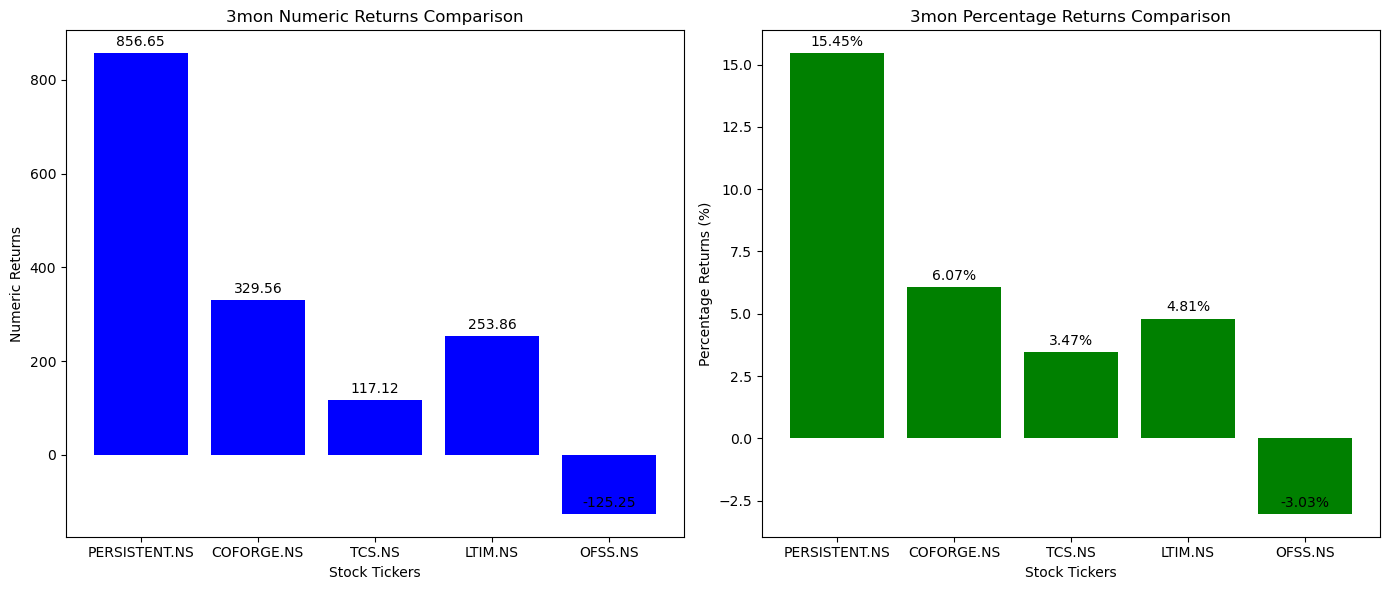

In [34]:
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_returns(ticker, start_date, end_date):
    # Download historical stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate closing prices for start and end dates
    start_price = stock_data['Adj Close'].iloc[0]
    end_price = stock_data['Adj Close'].iloc[-1]

    # Calculate numeric return
    numeric_return = end_price - start_price

    # Calculate percentage return
    percentage_return = (numeric_return / start_price) * 100

    return numeric_return, percentage_return

def plot_returns(tickers, start_date, end_date, duration):
    # Create lists to store numeric and percentage returns
    numeric_returns = []
    percentage_returns = []

    # Calculate returns for each ticker
    for ticker in tickers:
        numeric_return, percentage_return = calculate_returns(ticker, start_date, end_date)
        numeric_returns.append(numeric_return)
        percentage_returns.append(percentage_return)

    # Plot numeric and percentage returns using subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot numeric returns
    numeric_bars = axs[0].bar(tickers, numeric_returns, color='blue')
    axs[0].set_title(f'{duration.capitalize()} Numeric Returns Comparison')
    axs[0].set_xlabel('Stock Tickers')
    axs[0].set_ylabel('Numeric Returns')
    
    # Add annotations for numeric returns
    for bar, numeric_return in zip(numeric_bars, numeric_returns):
        axs[0].annotate(f"{numeric_return:.2f}", 
                        xy=(bar.get_x() + bar.get_width() / 2, numeric_return),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Plot percentage returns
    percentage_bars = axs[1].bar(tickers, percentage_returns, color='green')
    axs[1].set_title(f'{duration.capitalize()} Percentage Returns Comparison')
    axs[1].set_xlabel('Stock Tickers')
    axs[1].set_ylabel('Percentage Returns (%)')
    
    # Add annotations for percentage returns
    for bar, percentage_return in zip(percentage_bars, percentage_returns):
        axs[1].annotate(f"{percentage_return:.2f}%", 
                        xy=(bar.get_x() + bar.get_width() / 2, percentage_return),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Specify the stock tickers
tickers = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']

# Specify the date ranges
date_ranges = {
    "10y": ("2014-01-01", "2024-01-01"),
    "5y": ("2019-01-01", "2024-01-01"),
    "3y": ("2021-01-01", "2024-01-01"),
    "1y": ("2022-12-01", "2023-12-01"),
    "6mon": ("2023-06-01", "2023-12-01"),
    "3mon": ("2023-09-01", "2023-12-01")
}

# Plot returns for each duration
for duration, (start_date, end_date) in date_ranges.items():
    plot_returns(tickers, start_date, end_date, duration)


In [35]:

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data



def compare_stocks(tickers, start_date, end_date):
    # Fetch stock data
    stock_data = pd.DataFrame()
    for ticker in tickers:
        stock_data[ticker] = fetch_stock_data(ticker, start_date, end_date)['Adj Close']

   

    # Print key financial ratios
    for ticker in tickers:
        print(f'\nKey Financial Ratios for {ticker}:')
        try:
            stock_info = yf.Ticker(ticker).info
            dividend_yield = stock_info.get('dividendYield', 'N/A')
            pe_ratio = stock_info.get('trailingPE', 'N/A')
            print(f'Dividend Yield: {dividend_yield}')
            print(f'P/E Ratio: {pe_ratio}')
        except Exception as e:
            print(f'Error fetching financial ratios for {ticker}: {e}')

if __name__ == "__main__":
    stocks_to_compare = ['PERSISTENT.NS','COFORGE.NS','TCS.NS','LTIM.NS','OFSS.NS']
    start_date = '2013-01-01'
    end_date = '2024-01-01'

    compare_stocks(stocks_to_compare, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Key Financial Ratios for PERSISTENT.NS:
Dividend Yield: 0.0062
P/E Ratio: 70.63355

Key Financial Ratios for COFORGE.NS:
Dividend Yield: 0.0134000005
P/E Ratio: 52.20657

Key Financial Ratios for TCS.NS:
Dividend Yield: 0.010199999
P/E Ratio: 29.071398

Key Financial Ratios for LTIM.NS:
Dividend Yield: 0.0108
P/E Ratio: 38.068268

Key Financial Ratios for OFSS.NS:
Dividend Yield: 0.0555
P/E Ratio: 19.431747
